In [81]:
import pandas as pd

In [82]:
df = pd.read_csv('car.csv')

In [83]:
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


C:\Users\TH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speed', ylabel='dist'>

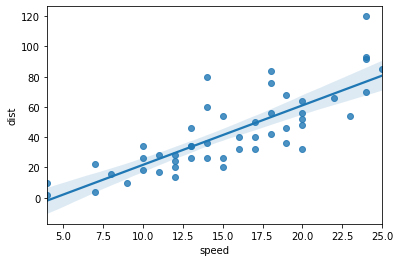

In [84]:
import seaborn as sns
# df에 들어있는 두개의 값의 선형 여부를 확인하기 위해 그래프를 그린다
sns.regplot('speed', 'dist',data=df)


C:\Users\TH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speed', ylabel='dist'>

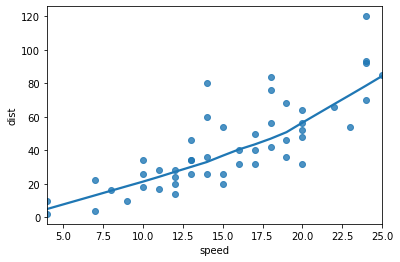

In [85]:
sns.regplot('speed', 'dist',data=df, lowess=True)  #추세선을 선형이 아니게 표현한다

C:\Users\TH\anaconda3\lib\site-packages\seaborn\_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<AxesSubplot:ylabel='dist'>

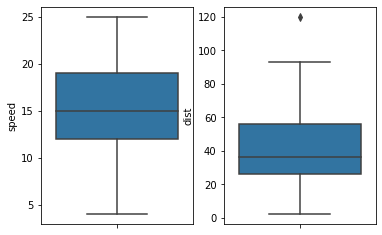

In [86]:
## 서브 플롯 활용
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
sns.boxplot(y='speed',orient='h', data=df, ax=ax1) #orient 세로 가로 바꾸는거 가로는 'h' 세로는 'v'
sns.boxplot(y='dist',orient='v', data=df, ax=ax2)

<AxesSubplot:xlabel='dist', ylabel='Density'>

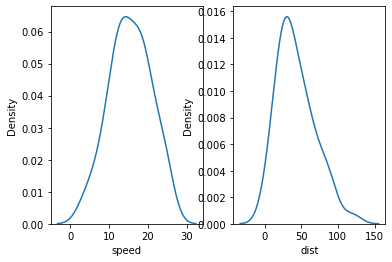

In [87]:
# 정규분포 여부 확인
fig , ax = plt.subplots(1, 2)

#밀도표현
sns.kdeplot(data=df, x='speed', ax=ax[0])
sns.kdeplot(data=df, x='dist', ax=ax[1])

In [88]:
# 데이터의 치우친 정도 왜도 구하기
import scipy.stats

scipy.stats.skew(df['speed']), scipy.stats.skew(df['dist'])
# speed는 왼쪽으로 조금 치우쳐
# dist는 오른쪽으로 조금 치우쳐
'''
 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
 평균과 중앙값이 같으면 왜도는 0이 된다.
'''

'\n 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. \n 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. \n 평균과 중앙값이 같으면 왜도는 0이 된다.\n'

# 회귀분석 실시

In [89]:
from statsmodels.formula.api import ols
#ols를 통해 회귀분석 실행

In [90]:
res = ols('dist ~ speed', data=df).fit()

- R제곱
  - 모형 적합도(혹은 설명력)
  - dist의 분산을 speed가 약 65%를 설명한다
  - 각 사례마다 dist에 차이가 있다.

- Adj. R-squared: 0.6438
  - 독립변수가 여러 개인 다중회귀분석에서 사용
  - 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정
  - 서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다

- F-statistic: 89.57, Prob(F-statistic): 1.49e-12
    - 회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미함 (p < 0.05)
    - 즉, 이 모형은 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형이라 할 수 있음

- 로그 우도: 종속변수가 정규분포라 가정했을 때 그 우도
    - 로그우도도 R제곱과 마찬가지로 독립변수가 많아지면 증가한다
    - AIC, BIC: 로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)

In [91]:
res.summary()
'''
R-squared:  0.651
Adj. R-squared:  0.644 
F-statistic: 89.57
Prob(F-statistic): 1.49e-12
Log-Likelihood: -206.58
AIC: 417.2
BIC: 421.0
#모형적합도를 보여주는 인수들
'''

'\nR-squared:  0.651\nAdj. R-squared:  0.644 \nF-statistic: 89.57\nProb(F-statistic): 1.49e-12\nLog-Likelihood: -206.58\nAIC: 417.2\nBIC: 421.0\n#모형적합도를 보여주는 인수들\n'

In [92]:
## coef가 계수 추정치
# intercept 는 절편, speed는 x1늘어날떄 y3.9324
# p < 0.05 일때 유의미한 자료로 볼 수 있다

- 보고서 형태

`dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,48) = 89.57, p < 0.05).`\
`speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측변인인 것으로 나타났다(t(48) = 9.464, p < 0.05).`

# 절편의 고정

In [93]:
res = ols('dist ~ 0 + speed', df).fit() #0을넣어 절편을 없앴다
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                    9.23e-26
Time:                        17:49:06   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          2.9091      0.141     20.578      0.000       2.625       3.193
==============================================================================
Omnibus:                       14.345   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.573
Skew:                           1.202   Prob(JB):                     0.000415
Kurtosis:                       4.302   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 다중공산성
- 공선성(collinearity): 하나의 독립변수가 다른 하나의 독립변수로 잘 예측되는 경우, 또는 서로 상관이 높은 경우
- 다중공선성(multicollinearity): 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우
- (다중)공선성이 있으면:
  - 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있다
  - 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있다
- 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단
- 엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)

In [94]:
df = pd.read_csv('crab.csv')
df.head()

,crab,sat,y,weight,width,color,spine
0,1,8,1,3.05,28.3,2,3
1,2,0,0,1.55,22.5,3,3
2,3,9,1,2.30,26.0,1,1
3,4,0,0,2.10,24.8,3,3
4,5,4,1,2.60,26.0,3,3


In [95]:
model = ols('y ~ sat + weight + width', data=df)

In [96]:
res = model.fit()

In [97]:
res.summary()
# weight, width 는 유의미 하지 안혹
# sat는 유의미하다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     59.69
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           2.30e-26
Time:                        17:49:06   Log-Likelihood:                -55.831
No. Observations:                 173   AIC:                             119.7
Df Residuals:                     169   BIC:                             132.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9366      0.500     -1.872      0.063      -1.924       0.051
sat            0.0971      0.009     11.018      0.000       0.080       0.115
weight        -0.0465      0.098     -0.475      0.635      -0.240       0.147
width          0.0535      0.026      2.023      0.045       0.001       0.106
==============================================================================
Omnibus:                       29.724   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.545
Skew:                           0.086   Prob(JB):                       0.0230
Kurtosis:                       1.992   Cond. No.                         526.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF 계산

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
model.exog_names #모형식에서 독립변수는 절편, sat, weight, width 순이다.

['Intercept', 'sat', 'weight', 'width']

In [100]:
variance_inflation_factor(model.exog, 1) # 모델의 첫번째 변수 sat 의 vif를 구한다

1.15883687808578

In [101]:
variance_inflation_factor(model.exog, 2) # weight의 vif

4.80167942403924

In [102]:
pd.DataFrame({'컬럼' : columns, 'VIF': variance_inflation_factor(model.exog, i)}
            for i, columns in enumerate(model.exog_names)
            if columns != 'Intercept')
#weight와 width의 VIF가 각각 4.8과 4.6이다. 게의 무게(weight)와 너비(width)는 서로 상관이 높기 때문에 VIF가 약간 높게 나타나는 것이다.

,컬럼,VIF
0,sat,1.158837
1,weight,4.801679
2,width,4.688660


<img src="대처.png">

In [103]:
model = ols('y ~ sat + weight', df)

In [104]:
model.fit().summary()
# width를 빼니 weight가 유의미해짐
# weight와 width가 공선성이 있기 때문에 width를 제거하자 weight가 유의미해진 것으로 볼 수 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     85.93
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           1.63e-26
Time:                        17:49:06   Log-Likelihood:                -57.901
No. Observations:                 173   AIC:                             121.8
Df Residuals:                     170   BIC:                             131.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0495      0.114      0.433      0.665      -0.176       0.275
sat            0.0976      0.009     10.982      0.000       0.080       0.115
weight         0.1260      0.049      2.598      0.010       0.030       0.222
==============================================================================
Omnibus:                       40.033   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.709
Skew:                           0.121   Prob(JB):                       0.0128
Kurtosis:                       1.928   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 잔차분석

In [105]:
df = pd.read_csv('car.csv')
res = ols('dist ~ speed', data=df).fit()

## 모형의 선형성
- 예측값(fitted)과 잔차(residual)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선)
- 빨간 실선은 잔차의 추세를 나타냄
- 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것

In [106]:
fitted = res.predict(df)
residual = df['dist'] - fitted

C:\Users\TH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


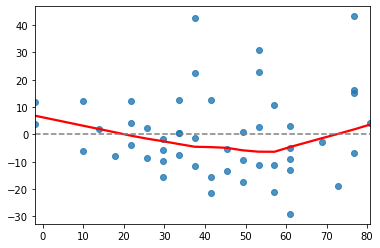

In [107]:
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
#졍규분포의 경우 잔차가 점선을 따라 배치되어있다

C:\Users\TH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


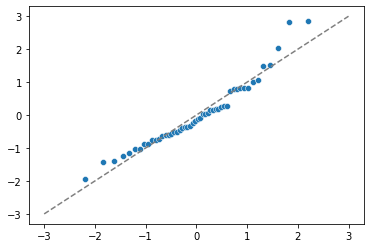

In [108]:
import scipy.stats

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')



In [109]:
scipy.stats.shapiro(residual)
#잔차의 정규성은 샤피로 검정으로 확인할 수 있다. 아래 분석에서 두 번째 값이 p값이다. p값이 0.02이므로 유의수준 5%에서 잔차의 정규성이 위반되었다고 판단한다.

ShapiroResult(statistic=0.9450905919075012, pvalue=0.02152460627257824)

## 잔차의 등분산성
- 회귀모형을 통햬 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌
- 빨간색 실선이 수평선을 그리는 것이 이상적

C:\Users\TH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

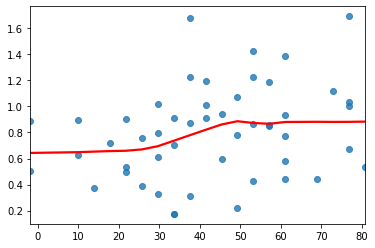

In [112]:
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

## 극단값
- Cook's distance는 극단값을 나타내는 지표

In [115]:
from statsmodels.stats.outliers_influence import OLSInfluence

cd, _ = OLSInfluence(res).cooks_distance
cd.sort_values(ascending=False).head()
#48 22 38 등이 예측값을 크게 벗어남을 확인할수 있다

48    0.340396
22    0.085552
38    0.068053
44    0.053176
34    0.052576
dtype: float64